In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
train = pd.read_csv(PATH+'train.csv')

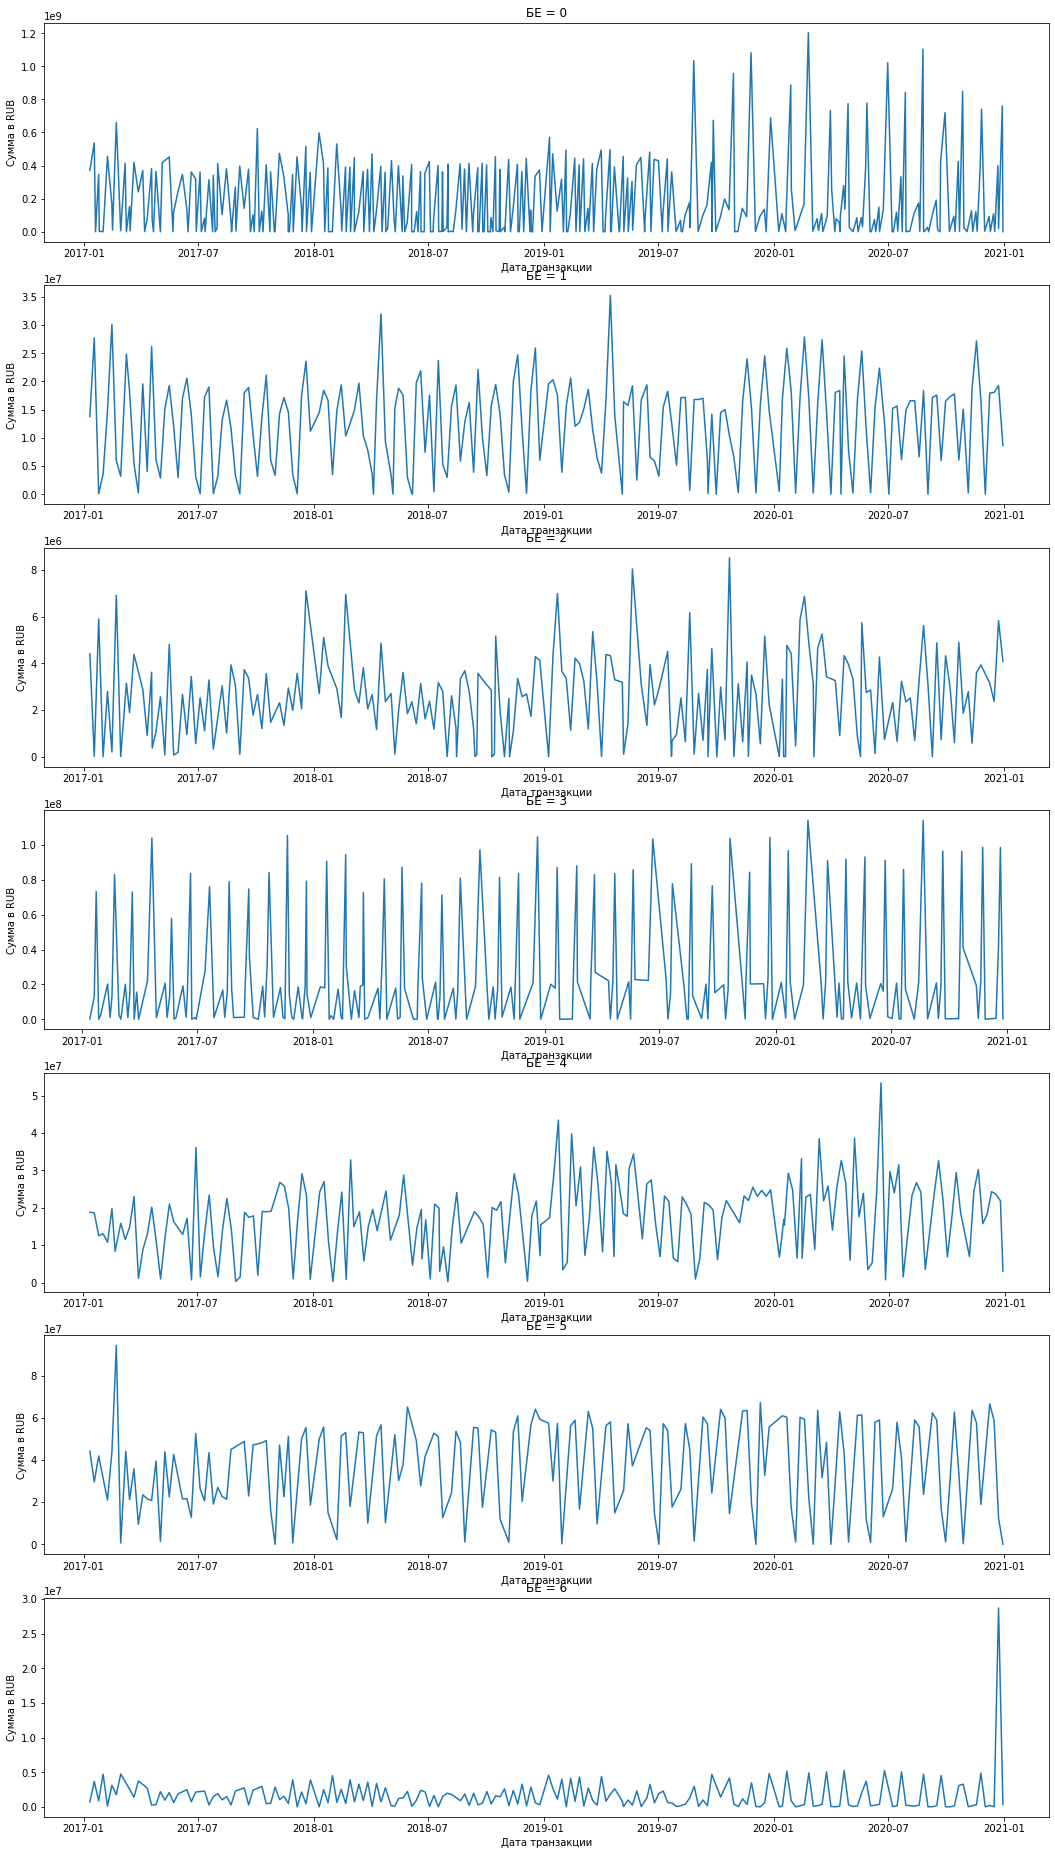

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(18, 33))
for i in np.arange(0, 7):
    train_be = train[train["БЕ"] == i].reset_index(drop=True)
    date = train_be["Дата транзакции"]
    ax[i].set_title('БЕ = ' + str(i))
    ax[i].set_xlabel('Дата транзакции')
    ax[i].set_ylabel('Сумма в RUB')
    sm = train_be["Сумма в RUB"]
    ax[i].plot(date, sm)



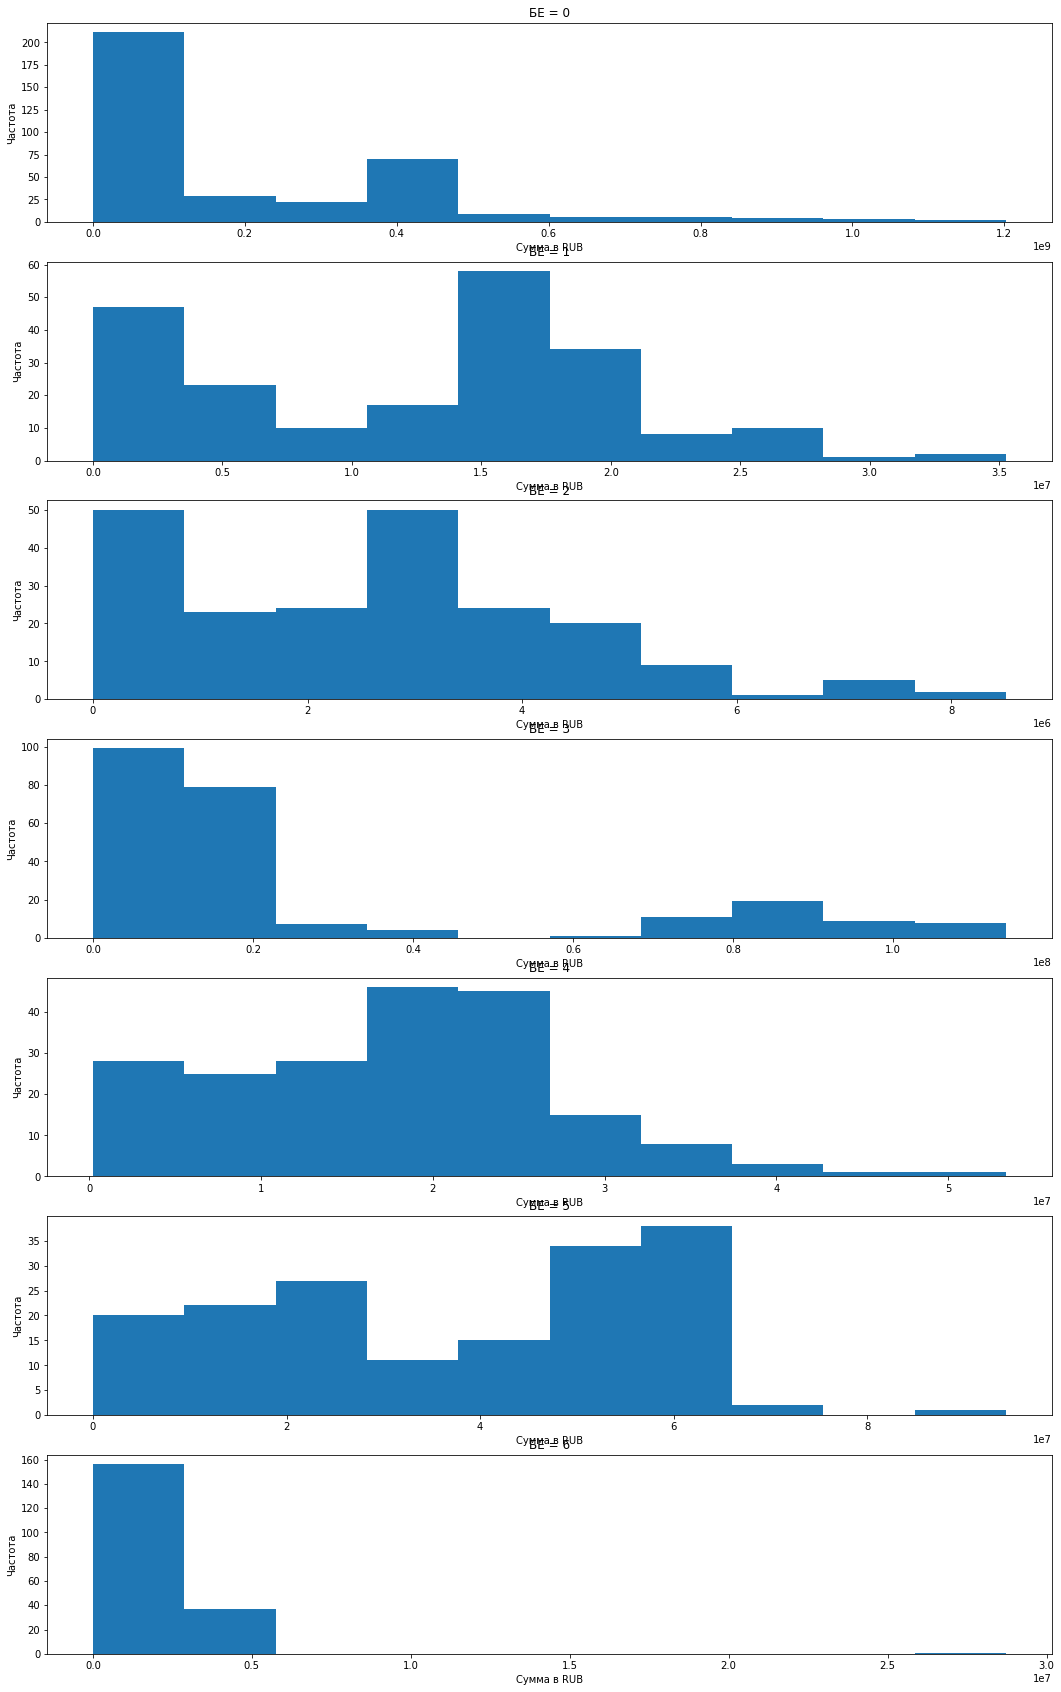

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(18, 30))
for i in np.arange(0, 7):
    train_be = train[train["БЕ"] == i].reset_index(drop=True)
    date = train_be["Дата транзакции"]
    sm = train_be["Сумма в RUB"]
    ax[i].set_title('БЕ = ' + str(i))
    ax[i].set_ylabel('Частота')
    ax[i].set_xlabel('Сумма в RUB')
    ax[i].hist(sm)


In [412]:
reform_columns = ['МОЩНОСТЬ', 'Рынок на сутки вперед (РСВ)', 'Электроэнергия по РД', 'Балансирующий рынок (покупка)', 'УСЛУГИ АТС, ЦФР и СО', 'Балансирующий рынок (продажа)', 'РСВ (продажа)']
trainNew = pd.read_csv(PATH+'trainNew.csv', sep=';', encoding='cp1251')#БЕ = 5
trainNew = trainNew.dropna(axis='index', how='all')
trainNew.drop(['Год', 'Месяц'], inplace=True, axis=1)
for column in reform_columns:
    trainNew[column] = trainNew[(trainNew['МОЩНОСТЬ'].notna())][column].str.replace(' ','').str.replace(',','.').astype(float)
trainNew['Объем потребления, кВтч'] = trainNew['Объем потребления, кВтч'].str.split().str.join(' ')
trainNew['Объем потребления, кВтч'] = trainNew[(trainNew['МОЩНОСТЬ'].notna())]['Объем потребления, кВтч'].str.replace(' ','').astype(float)
trainNew['Дата транзакции'] = pd.to_datetime(train['Дата транзакции'])
trainNew['Год'] = trainNew['Дата транзакции'].dt.year
trainNew['Месяц'] = trainNew['Дата транзакции'].dt.month
trainNew['День'] = trainNew['Дата транзакции'].dt.day
del trainNew['Дата транзакции']
trainNew.head()

,БЕ,Сумма транзакции в RUB,МОЩНОСТЬ,Рынок на сутки вперед (РСВ),Электроэнергия по РД,Балансирующий рынок (покупка),"УСЛУГИ АТС, ЦФР и СО",Балансирующий рынок (продажа),РСВ (продажа),"Объем потребления, кВтч",Год,Месяц,День
0,3.0,-1.998140e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,11
1,3.0,-1.302910e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,18
2,3.0,-7.326505e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,25
3,3.0,-4.644618e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,2,8
4,3.0,-2.235017e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,2,15


In [413]:
trainNewWithoutNan = trainNew.dropna(axis='index', how='any')
trainNewWithoutNan.head()

,БЕ,Сумма транзакции в RUB,МОЩНОСТЬ,Рынок на сутки вперед (РСВ),Электроэнергия по РД,Балансирующий рынок (покупка),"УСЛУГИ АТС, ЦФР и СО",Балансирующий рынок (продажа),РСВ (продажа),"Объем потребления, кВтч",Год,Месяц,День
131,3.0,-2.012275e+07,27856722.58,1172518.28,8229338.75,1909600.13,314082.63,-659523.88,-1940955.58,88893306.0,2020,2,26
132,3.0,-1.782605e+07,27856722.58,1172518.28,8229338.75,1909600.13,314082.63,-659523.88,-1940955.58,88893306.0,2020,3,4
133,3.0,-8.708560e+07,27856722.58,1172518.28,8229338.75,1909600.13,314082.63,-659523.88,-1940955.58,88893306.0,2020,3,11
134,3.0,-1.917723e+04,27856722.58,1172518.28,8229338.75,1909600.13,314082.63,-659523.88,-1940955.58,88893306.0,2020,3,18
135,3.0,-1.452109e+05,29457544.09,1911608.62,52686114.39,556880.95,291290.45,-1161772.16,-1015795.65,80434679.0,2020,3,25


In [414]:
trainNewMean = trainNew.fillna(trainNew.mean())
trainNewMean.head()

,БЕ,Сумма транзакции в RUB,МОЩНОСТЬ,Рынок на сутки вперед (РСВ),Электроэнергия по РД,Балансирующий рынок (покупка),"УСЛУГИ АТС, ЦФР и СО",Балансирующий рынок (продажа),РСВ (продажа),"Объем потребления, кВтч",Год,Месяц,День
0,3.0,-1.998140e+05,3.360129e+07,1.808523e+06,5.473376e+07,996733.002925,407138.373491,-794233.351132,-1.792951e+06,8.405762e+07,2017,1,11
1,3.0,-1.302910e+07,3.360129e+07,1.808523e+06,5.473376e+07,996733.002925,407138.373491,-794233.351132,-1.792951e+06,8.405762e+07,2017,1,18
2,3.0,-7.326505e+07,3.360129e+07,1.808523e+06,5.473376e+07,996733.002925,407138.373491,-794233.351132,-1.792951e+06,8.405762e+07,2017,1,25
3,3.0,-4.644618e+03,3.360129e+07,1.808523e+06,5.473376e+07,996733.002925,407138.373491,-794233.351132,-1.792951e+06,8.405762e+07,2017,2,8
4,3.0,-2.235017e+06,3.360129e+07,1.808523e+06,5.473376e+07,996733.002925,407138.373491,-794233.351132,-1.792951e+06,8.405762e+07,2017,2,15


In [ ]:
!pip install -U lightautoml

In [406]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [415]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300
TARGET_NAME_MEAN = 'Сумма транзакции в RUB'

In [416]:
DATASET_DIR = '../dataHack/'
DATASET_NAME = 'trainNewWithoutNan.csv'
DATASET_FULLNAME = os.path.join(DATASET_DIR, DATASET_NAME)

In [417]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [440]:
prd_columns_mean = ['БЕ', 'МОЩНОСТЬ', 'Рынок на сутки вперед (РСВ)', 'Электроэнергия по РД', 'Балансирующий рынок (покупка)', 'УСЛУГИ АТС, ЦФР и СО', 'Балансирующий рынок (продажа)', 'РСВ (продажа)', 'Объем потребления, кВтч', 'Год', 'Месяц', 'День']
float_columns_mean = ['БЕ', 'МОЩНОСТЬ', 'Рынок на сутки вперед (РСВ)', 'Электроэнергия по РД', 'Балансирующий рынок (покупка)', 'УСЛУГИ АТС, ЦФР и СО', 'Балансирующий рынок (продажа)', 'РСВ (продажа)', 'Объем потребления, кВтч']

In [441]:
data_mean = trainNewMean

In [442]:
X_mean = data_mean[prd_columns_mean]
y_mean = data_mean['Сумма транзакции в RUB']

In [443]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean.values, y_mean.values, 
                                                       train_size=1-TEST_SIZE, 
                                                       random_state=RANDOM_STATE)

In [444]:
X_train_mean, y_train_mean = pd.DataFrame(X_train_mean, columns = prd_columns_mean), pd.DataFrame(y_train_mean, columns = ['Сумма транзакции в RUB'])
X_test_mean, y_test_mean = pd.DataFrame(X_test_mean, columns = prd_columns_mean), pd.DataFrame(y_test_mean, columns = ['Сумма транзакции в RUB'])

In [445]:
tr_data_mean = X_train_mean.join(y_train_mean)
te_data_mean = X_test_mean.join(y_test_mean)

In [446]:
tr_data_mean[float_columns_mean] = tr_data_mean[float_columns_mean].astype(float)
te_data_mean[float_columns_mean] = te_data_mean[float_columns_mean].astype(float)

In [447]:
task = Task('reg')

In [448]:
roles_mean = {
    'target': TARGET_NAME_MEAN,
    'drop': ['БЕ']
}

In [449]:
automl_mean = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [450]:
%%time 
oof_pred_mean = automl_mean.fit_predict(tr_data_mean, roles = roles_mean, verbose = 1)

[15:14:16] Stdout logging level is INFO.
[15:14:16] Task: reg

[15:14:16] Start automl preset with listed constraints:
[15:14:16] - time: 300.00 seconds
[15:14:16] - CPU: 4 cores
[15:14:16] - memory: 16 GB

[15:14:16] Train data shape: (189, 13)

[15:14:17] Layer 1 train process start. Time left 299.70 secs
[15:14:17] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[15:14:19] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -1741505079309633.0
[15:14:19] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[15:14:19] Time left 297.21 secs

[15:14:19] Selector_LightGBM fitting and predicting completed
[15:14:19] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[15:14:19] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -1094578832157719.2
[15:14:19] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[15:14:19] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 71.56 secs
[15:14:26] Hyperparameters optimization for Lvl_0_Pip

In [451]:
%%time
te_pred_mean = automl_mean.predict(te_data_mean)
print(f'Prediction for te_data:\n{te_pred_mean}\nShape = {te_pred_mean.shape}')

Prediction for te_data:
array([[-23762334.],
       [-19227746.],
       [-24362958.],
       [-32776346.],
       [-26515694.],
       [-28466068.],
       [-32776346.],
       [-23492544.],
       [-22844108.],
       [-25453264.],
       [-26730526.],
       [-26948768.],
       [-28445062.],
       [-27819274.],
       [-25360304.],
       [-23993686.],
       [-21404474.],
       [-27678862.],
       [-28546592.],
       [-20145634.],
       [-27311012.],
       [-22376258.],
       [-21843882.],
       [-25517736.],
       [-29686282.],
       [-23762334.],
       [-38510448.],
       [-21473194.],
       [-23762334.],
       [-22695040.],
       [-22510996.],
       [-34413364.],
       [-23878698.],
       [-23757300.],
       [-24200474.],
       [-24290792.],
       [-24192296.],
       [-21563158.],
       [-22107688.],
       [-24806630.],
       [-24260410.],
       [-26515694.],
       [-19227746.],
       [-26709708.],
       [-36589092.],
       [-27686100.],
       [-2

In [452]:
print(f"MAE on train data - {mean_absolute_error(tr_data_mean[TARGET_NAME_MEAN].values, oof_pred_mean.data[:, 0])}")
print(f"MAE on train data - {mean_absolute_error(te_data_mean[TARGET_NAME_MEAN].values, te_pred_mean.data[:, 0])}")

MAE on train data - 25535328.727597483
MAE on train data - 27190625.453158174


In [453]:
print(automl_mean.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) 


In [454]:
RD_mean = ReportDeco(output_path = 'tabularAutoML_model_report_mean')

automl_rd_mean = RD_mean(
    TabularAutoML(
        task = task, 
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [455]:
%%time
oof_pred_mean = automl_rd_mean.fit_predict(tr_data_mean, roles = roles_mean, verbose = 1)

[15:16:14] Stdout logging level is INFO.
[15:16:14] Task: reg

[15:16:14] Start automl preset with listed constraints:
[15:16:14] - time: 300.00 seconds
[15:16:14] - CPU: 4 cores
[15:16:14] - memory: 16 GB

[15:16:14] Train data shape: (189, 13)

[15:16:14] Layer 1 train process start. Time left 299.65 secs
[15:16:14] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[15:16:16] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -1741505079309633.0
[15:16:16] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[15:16:16] Time left 298.15 secs

[15:16:16] Selector_LightGBM fitting and predicting completed
[15:16:16] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[15:16:16] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -1094578832157719.2
[15:16:16] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[15:16:16] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 71.88 secs
[15:16:29] Hyperparameters optimization for Lvl_0_Pip

In [456]:
!ls tabularAutoML_model_report_mean

feature_importance.png	      valid_scatter_plot.png
lama_interactive_report.html  valid_target_distribution.png
valid_error_hist.png


In [457]:
%%time

te_pred = automl_rd_mean.predict(te_data_mean)
print(f'Prediction for te_data:\n{te_pred_mean}\nShape = {te_pred_mean.shape}')

Prediction for te_data:
array([[-23762334.],
       [-19227746.],
       [-24362958.],
       [-32776346.],
       [-26515694.],
       [-28466068.],
       [-32776346.],
       [-23492544.],
       [-22844108.],
       [-25453264.],
       [-26730526.],
       [-26948768.],
       [-28445062.],
       [-27819274.],
       [-25360304.],
       [-23993686.],
       [-21404474.],
       [-27678862.],
       [-28546592.],
       [-20145634.],
       [-27311012.],
       [-22376258.],
       [-21843882.],
       [-25517736.],
       [-29686282.],
       [-23762334.],
       [-38510448.],
       [-21473194.],
       [-23762334.],
       [-22695040.],
       [-22510996.],
       [-34413364.],
       [-23878698.],
       [-23757300.],
       [-24200474.],
       [-24290792.],
       [-24192296.],
       [-21563158.],
       [-22107688.],
       [-24806630.],
       [-24260410.],
       [-26515694.],
       [-19227746.],
       [-26709708.],
       [-36589092.],
       [-27686100.],
       [-2

In [458]:
te_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   БЕ                             48 non-null     float64
 1   МОЩНОСТЬ                       48 non-null     float64
 2   Рынок на сутки вперед (РСВ)    48 non-null     float64
 3   Электроэнергия по РД           48 non-null     float64
 4   Балансирующий рынок (покупка)  48 non-null     float64
 5   УСЛУГИ АТС, ЦФР и СО           48 non-null     float64
 6   Балансирующий рынок (продажа)  48 non-null     float64
 7   РСВ (продажа)                  48 non-null     float64
 8   Объем потребления, кВтч        48 non-null     float64
 9   Год                            48 non-null     float64
 10  Месяц                          48 non-null     float64
 11  День                           48 non-null     float64
 12  Сумма транзакции в RUB         48 non-null     float

In [461]:
# Fast feature importances calculation
fast_fi_mean = automl_rd_mean.model.get_feature_scores('fast')

In [462]:
fast_fi_mean

,Feature,Importance
0,"УСЛУГИ АТС, ЦФР и СО",6.947960e+15
1,День,4.528687e+15
2,Месяц,1.186710e+15


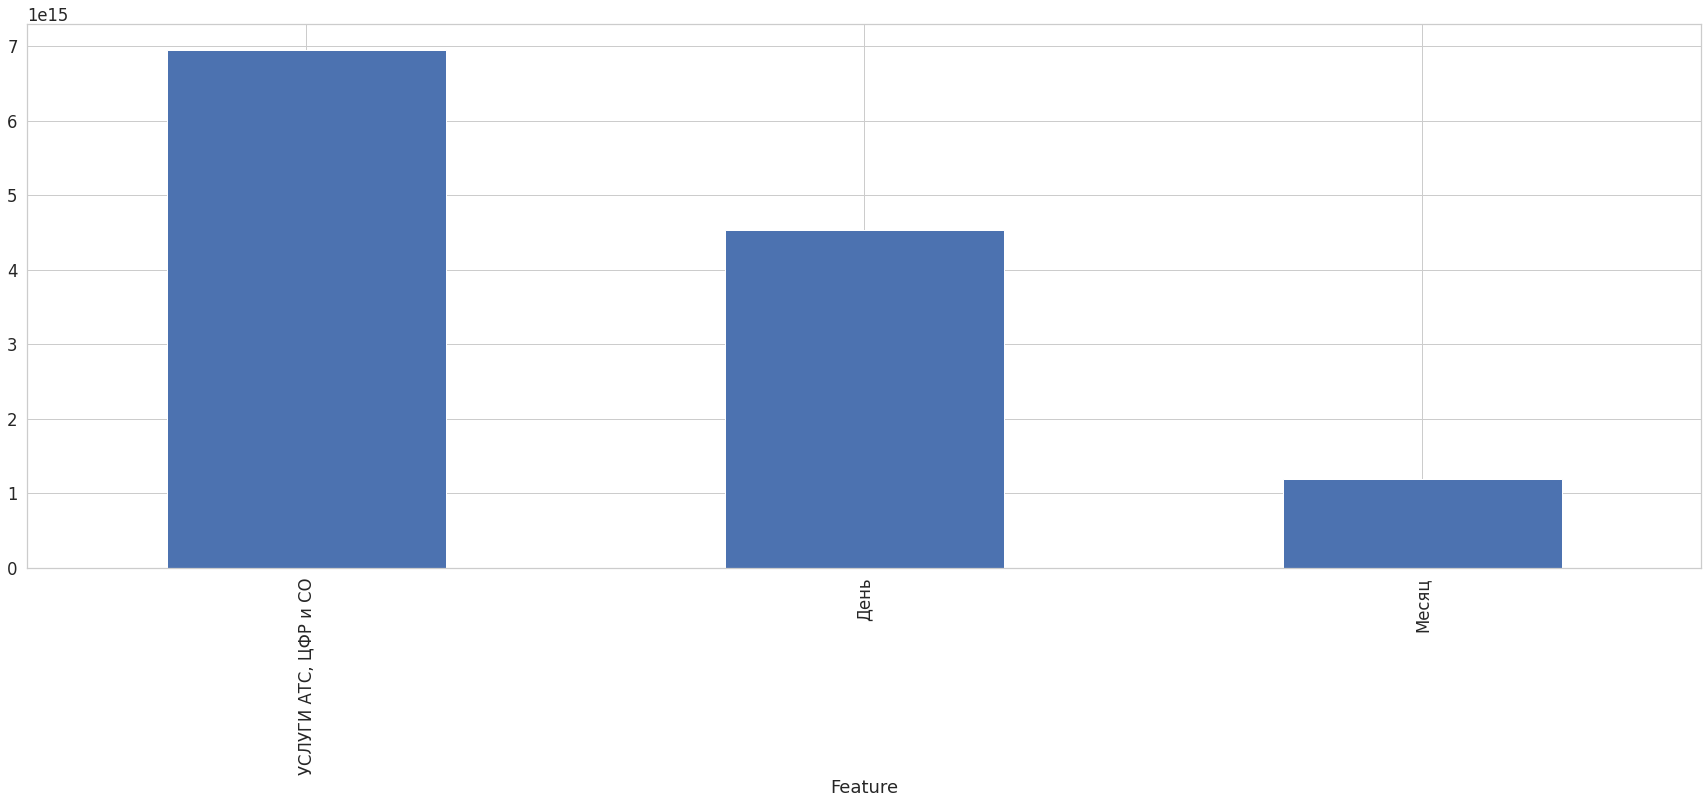

In [463]:
fast_fi_mean.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [516]:
data_one_hot = pd.read_csv(PATH + 'train.csv')

In [517]:
new_df = data_one_hot['Дата транзакции'].str.split('-',expand=True)
data_one_hot = pd.concat([data_one_hot,new_df], axis = 1)
data_one_hot.rename(columns={0: 'year', 1: 'month', 2: 'day'}, inplace=True)

In [518]:
def quantityPerCategory(col):
  new_col = [1]
  j = 2
  for i in range(1, len(list(data[col]))):
    if data[col][i] == data[col][i - 1]:
      new_col.append(j)
      j += 1
    else:
      new_col.append(1)
      j = 2
  return new_col

In [519]:
data_one_hot = pd.concat([data_one_hot, pd.Series(quantityPerCategory('day'))], axis = 1)
data_one_hot.rename(columns={0: 'quantityPerDay'}, inplace = True)
data_one_hot = pd.concat([data_one_hot, pd.Series(quantityPerCategory('month'))], axis = 1)
data_one_hot.rename(columns={0: 'quantityPerMonth'}, inplace = True)
data_one_hot = pd.concat([data_one_hot, pd.Series(quantityPerCategory('year'))], axis = 1)
data_one_hot.rename(columns={0: 'quantityPerYear'}, inplace = True)
new_col = []
for i in range(len(list(data_one_hot['month']))):
  if data_one_hot['month'][i] in ['01', '02', '03']:
    new_col.append(1)
  if data_one_hot['month'][i] in ['04', '05', '06']:
    new_col.append(2)
  if data_one_hot['month'][i] in ['07', '08', '09']:
    new_col.append(3)
  if data_one_hot['month'][i] in ['10', '11', '12']:
    new_col.append(4)
data_one_hot = pd.concat([data_one_hot, pd.Series(new_col)], axis = 1)
data_one_hot.rename(columns={0: 'Quarter'}, inplace = True)

In [520]:
TARGET_NAME_ONE_HOT = 'Сумма в RUB'

In [521]:
roles_one_hot = {
    'target': TARGET_NAME_ONE_HOT,
}

In [522]:
prd_columns_one_hot = list(data_one_hot.columns)
prd_columns_one_hot.remove('Сумма в RUB')

In [523]:
float_columns_one_hot = ['БЕ', 'day', 'quantityPerDay', 'quantityPerYear']

In [524]:
X_one_hot = data_one_hot[prd_columns_one_hot]
y_one_hot = data_one_hot['Сумма в RUB']

In [525]:
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(X_one_hot.values, y_one_hot.values, 
                                                       train_size=1-TEST_SIZE, 
                                                       random_state=RANDOM_STATE)

X_train_one_hot, y_train_one_hot = pd.DataFrame(X_train_one_hot, columns = prd_columns_one_hot), pd.DataFrame(y_train_one_hot, columns = ['Сумма в RUB'])
X_test_one_hot, y_test_one_hot = pd.DataFrame(X_test_one_hot, columns = prd_columns_one_hot), pd.DataFrame(y_test_one_hot, columns = ['Сумма в RUB'])

tr_data_one_hot = X_train_one_hot.join(y_train_one_hot)
te_data_one_hot = X_test_one_hot.join(y_test_one_hot)

In [572]:
tr_data_one_hot.head()

,БЕ,Дата транзакции,day,quantityPerDay,quantityPerYear,Сумма в RUB,year_2017,year_2018,year_2019,year_2020,...,quantityPerMonth_7,quantityPerMonth_8,quantityPerMonth_9,quantityPerMonth_10,quantityPerMonth_11,quantityPerMonth_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,3.0,2018-07-20,20.0,1.0,40.0,-1.352054e+07,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,2018-01-17,17.0,1.0,2.0,-5.104896e+06,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6.0,2019-07-24,24.0,1.0,29.0,-5.389886e+05,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,6.0,2019-09-25,25.0,1.0,38.0,-4.697435e+06,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3.0,2017-12-22,22.0,1.0,67.0,-1.425632e+07,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [526]:
tr_data_one_hot = pd.get_dummies(tr_data_one_hot, columns = ['year', 'month', 'quantityPerMonth', 'Quarter'])
te_data_one_hot = pd.get_dummies(te_data_one_hot, columns = ['year', 'month', 'quantityPerMonth', 'Quarter'])

In [527]:
tr_data_one_hot[float_columns_one_hot] = tr_data_one_hot[float_columns_one_hot].astype(float)
te_data_one_hot[float_columns_one_hot] = te_data_one_hot[float_columns_one_hot].astype(float)

In [528]:
automl_one_hot = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [529]:
%%time 
oof_pred_one_hot = automl_one_hot.fit_predict(tr_data_one_hot, roles = roles_one_hot, verbose = 1)

[15:28:27] Stdout logging level is INFO.
[15:28:27] Task: reg

[15:28:27] Start automl preset with listed constraints:
[15:28:27] - time: 300.00 seconds
[15:28:27] - CPU: 4 cores
[15:28:27] - memory: 16 GB

[15:28:27] Train data shape: (1263, 38)

[15:28:30] Layer 1 train process start. Time left 297.37 secs
[15:28:30] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[15:28:32] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -2.018262701051258e+16
[15:28:32] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[15:28:32] Time left 295.72 secs

[15:28:32] Selector_LightGBM fitting and predicting completed
[15:28:32] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[15:28:40] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -6946940504002117.0
[15:28:40] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[15:28:40] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 21.44 secs
[15:29:02] Hyperparameters optimization for Lvl_0

In [ ]:
%%time

te_pred_one_hot = automl_one_hot.predict(te_data_one_hot)
print(f'Prediction for te_data:\n{te_pred_one_hot}\nShape = {te_pred_one_hot.shape}')

In [550]:
print(f"MAE on train data - {mean_absolute_error(tr_data_one_hot[TARGET_NAME_ONE_HOT].values, oof_pred_one_hot.data[:, 0])}")
print(f"MAE on train data - {mean_absolute_error(te_data_one_hot[TARGET_NAME_ONE_HOT].values, te_pred_one_hot.data[:, 0])}")

MAE on train data - 32188516.06143949
MAE on train data - 30270420.997613978


In [553]:
RD_one_hot = ReportDeco(output_path = 'tabularAutoML_model_report_one_hot')

automl_rd_one_hot = RD_one_hot(
    TabularAutoML(
        task = task, 
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [554]:
%%time
oof_pred_one_hot = automl_rd_one_hot.fit_predict(tr_data_one_hot, roles = roles_one_hot, verbose = 1)

[15:47:09] Stdout logging level is INFO.
[15:47:09] Task: reg

[15:47:09] Start automl preset with listed constraints:
[15:47:09] - time: 300.00 seconds
[15:47:09] - CPU: 4 cores
[15:47:09] - memory: 16 GB

[15:47:09] Train data shape: (1263, 38)

[15:47:14] Layer 1 train process start. Time left 294.80 secs
[15:47:14] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[15:47:18] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -2.018262701051258e+16
[15:47:18] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[15:47:18] Time left 290.72 secs

[15:47:18] Selector_LightGBM fitting and predicting completed
[15:47:18] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[15:47:22] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -6946940504002117.0
[15:47:22] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[15:47:22] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 56.14 secs
[15:48:18] Hyperparameters optimization for Lvl_0

In [555]:
!ls tabularAutoML_model_report_one_hot

feature_importance.png	      valid_scatter_plot.png
lama_interactive_report.html  valid_target_distribution.png
valid_error_hist.png


In [556]:
%%time
te_pred_one_hot = automl_rd_one_hot.predict(te_data_one_hot)
print(f'Prediction for te_data:\n{te_pred_one_hot}\nShape = {te_pred_one_hot.shape}')

Prediction for te_data:
array([[-8.05783700e+06],
       [-3.04798720e+08],
       [-1.72791700e+07],
       [-1.07884560e+07],
       [-1.66690300e+07],
       [-6.13892450e+06],
       [-1.31337440e+07],
       [-1.44535280e+07],
       [-1.73730960e+07],
       [-4.06076160e+07],
       [-1.19865336e+08],
       [-5.97412600e+06],
       [-2.73208096e+08],
       [-1.55216740e+07],
       [-4.18447900e+06],
       [-2.00303088e+08],
       [-1.48176020e+07],
       [-6.96291150e+06],
       [-3.30113680e+07],
       [-2.94283720e+07],
       [-5.96065750e+06],
       [-4.20104700e+06],
       [-1.19326330e+07],
       [ 8.89792800e+06],
       [-1.82911600e+07],
       [-2.61695536e+08],
       [-1.63197010e+07],
       [-1.49693410e+07],
       [-4.71037200e+06],
       [-1.96617240e+07],
       [-3.95727040e+07],
       [-7.25668950e+06],
       [-3.51181312e+08],
       [-1.21332328e+08],
       [-3.40680512e+08],
       [-2.72508032e+08],
       [-8.06215520e+07],
       [-2.689

In [557]:
# Fast feature importances calculation
fast_fi_one_hot = automl_rd_one_hot.model.get_feature_scores('fast')

In [558]:
fast_fi_one_hot

,Feature,Importance
0,БЕ,2.132249e+20
1,Дата транзакции,1.156446e+20
2,day,8.906338e+19
3,quantityPerMonth_1,2.890961e+19
4,quantityPerYear,2.638560e+19
5,year_2018,3.960519e+18
6,year_2019,1.564256e+18
7,Quarter_2,1.400741e+18
8,quantityPerMonth_5,1.215160e+18
9,quantityPerMonth_4,1.119670e+18


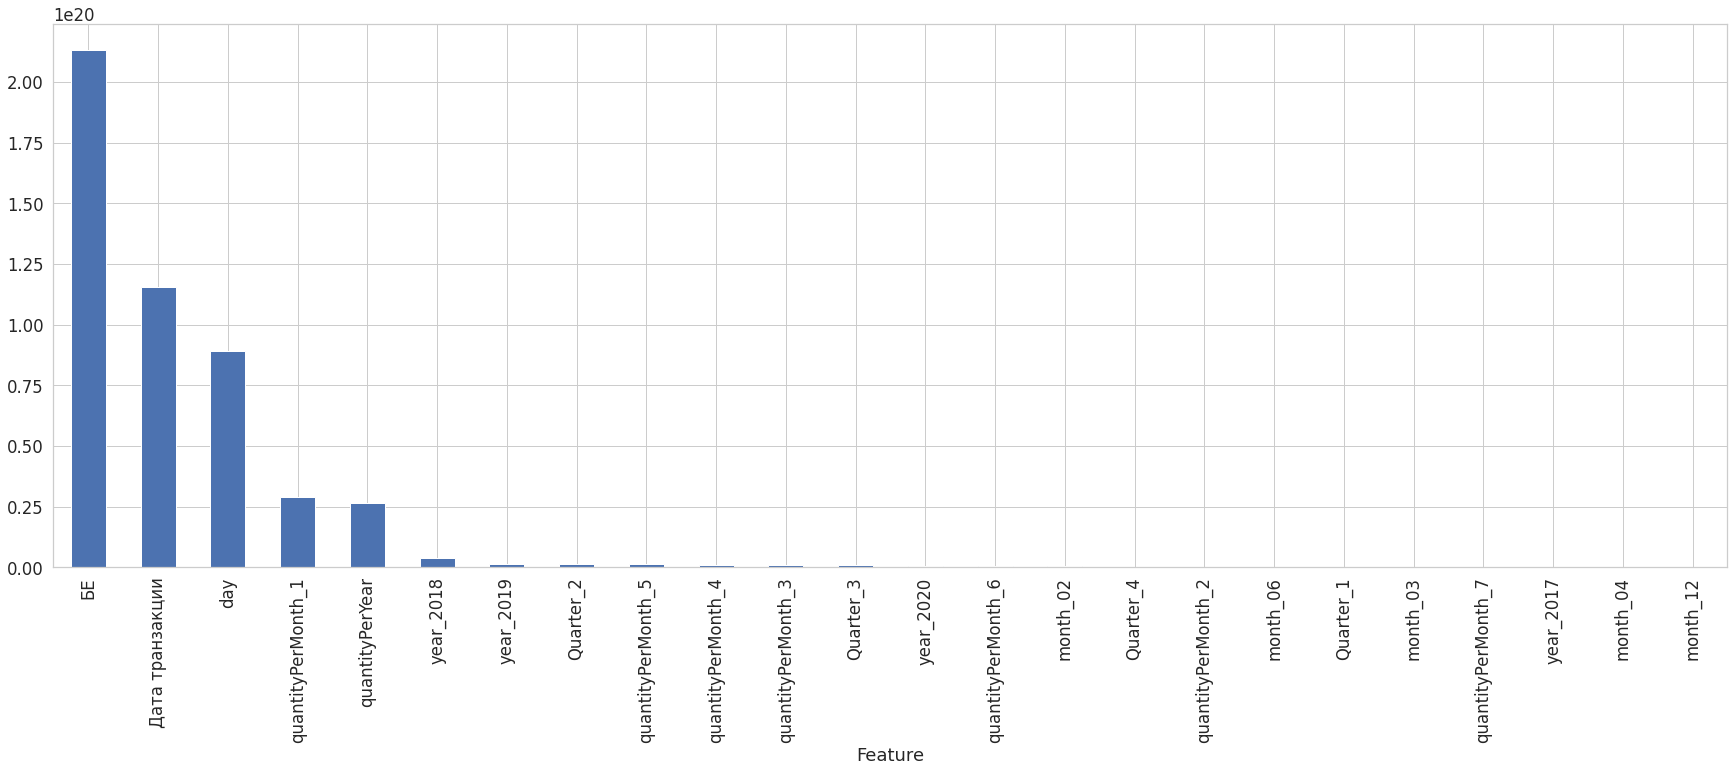

In [559]:
fast_fi_one_hot.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [571]:
data_mean

,БЕ,Сумма транзакции в RUB,МОЩНОСТЬ,Рынок на сутки вперед (РСВ),Электроэнергия по РД,Балансирующий рынок (покупка),"УСЛУГИ АТС, ЦФР и СО",Балансирующий рынок (продажа),РСВ (продажа),"Объем потребления, кВтч",Год,Месяц,День
0,3.0,-1.998140e+05,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,1,11
1,3.0,-1.302910e+07,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,1,18
2,3.0,-7.326505e+07,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,1,25
3,3.0,-4.644618e+03,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,2,8
4,3.0,-2.235017e+06,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,2,15
5,3.0,-2.025478e+07,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,2,22
6,3.0,-1.060289e+06,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,3,1
7,3.0,-1.356789e+07,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,3,9
8,3.0,-8.296261e+07,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,3,15
9,3.0,-2.574018e+06,3.360129e+07,1.808523e+06,5.473376e+07,9.967330e+05,407138.373491,-7.942334e+05,-1.792951e+06,8.405762e+07,2017,3,22


In [570]:
data_one_hot


,БЕ,Дата транзакции,Сумма в RUB,year,month,day,quantityPerDay,quantityPerMonth,quantityPerYear,Quarter
0,5,2017-01-11,-4.416300e+07,2017,01,11,1,1,1,1
1,5,2017-01-18,-2.960046e+07,2017,01,18,1,2,2,1
2,5,2017-01-25,-4.189707e+07,2017,01,25,1,3,3,1
3,5,2017-02-08,-2.098554e+07,2017,02,08,1,1,4,1
4,5,2017-02-15,-4.373594e+07,2017,02,15,1,2,5,1
